# Assignment 10
## Applied Machine Learning

Andrew Chan 
EBE869

# 1. [10 pts] Download the labeled dataset, 
if you like use a dummy email address for
registration. There must be 8 data files, each representing a particular cyber-attack type
and it's day, and it's collected pcap data

This assignment assumes that the following 8 .csv files are in the same directory as this notebook:
* Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
* Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
* Friday-WorkingHours-Morning.pcap_ISCX.csv
* Monday-WorkingHours.pcap_ISCX.csv
* Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
* Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
* Tuesday-WorkingHours.pcap_ISCX.csv
* Wednesday-workingHours.pcap_ISCX.csv

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np

# Locate and load the data file
df = pd.read_csv('Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

# Sanity check
print(f'N rows={len(df)}, M columns={len(df.columns)}')
df.head()

N rows=225745, M columns=79


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [8]:
df.columns.values

array([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length',
       ' Packet Length Mean', ' Packet Length Std',
       ' Packet Length Varia

In [4]:
a = df.dtypes

# 2. [10 pts] Pick one of the data files, call it Dataset 1, and examine its features. Make sure it has more than one class value for its label

In [13]:
df[' Label'].value_counts()

DDoS      128027
BENIGN     97718
Name:  Label, dtype: int64

# 3. [10 pts] For the Dataset 1, pick a machine learning methodology and justify your choice.


* I will choose Random Forest Classifier

# 4. [10 pts] Process the class feature/category as binary classes for supervised learning, assign BENIGN to value 0 and the rest to value 1. Check its balance for the Dataset 1

In [14]:
class_mapping = { 'BENIGN' : 0, 'DDoS' : 1 }

In [17]:
df[' Label'] = df[' Label'].map(class_mapping)

In [20]:
df[' Label'].value_counts()

1    128027
0     97718
Name:  Label, dtype: int64

# Preprocessing

## Imputation: Replace `?` with padding

## One hot encoding

In [11]:
df_no_target = pd.get_dummies(df[[' Destination Port']], drop_first = True)
df_no_target.head()

,Destination Port
0,54865
1,55054
2,55055
3,46236
4,54863


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_y = df['class']
df_X = df_no_target
y = le.fit_transform(df_y.values)
X = df_X.values

In [8]:
le.classes_

array(['e', 'p'], dtype=object)

# 1.  [70 pts] By using at least 4 classifiers and 5 different hyper-parameter settings for each, generate operating points and plot them on ROC.

Do not hesitate to use/modify the ROC
plot code in the module notebook. In case you do not see enough variety in Pd-Pf you
might need to work on the classifiers set and/or hyper parameters. And do not hesitate to
try hundreds if necessary, since the ROC is just a natural scatter plot. (Recommend linear
SVM, RBF SVM, logistic regression, random forest, etc.)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.metrics import auc

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.99, random_state=0)

In [11]:
y_train.shape

(81,)

In [12]:
y_test.shape

(8043,)

In [13]:
X_train.shape

(81, 94)

In [14]:
X_test.shape

(8043, 94)

## Linear SVM

In [15]:
from sklearn.svm import LinearSVC
from sklearn import metrics
clf = LinearSVC(random_state=0)
clf.fit(X_train, y_train)

LinearSVC(random_state=0)

In [16]:
predicted = clf.predict(X_test)

In [17]:
print(f'Classification report for classifier {clf}:\n{metrics.accuracy_score(y_test, predicted)}\n')

Classification report for classifier LinearSVC(random_state=0):
0.9629491483277384



In [18]:
from sklearn.svm import SVC
def calc_roc_svc (C, X_train,X_test,y_train,y_test):
    # Let's vary C and generate training/testing sessions to collect data for ROC
    FPR, TPR = [], []
    for c in C:
        pipe_lr = LinearSVC(random_state=0,C=c)
        pipe_lr.fit(X_train, y_train)
        y_pred = pipe_lr.predict(X_test)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        TPR += [tp/(tp+fn)]  # Pd
        FPR += [fp/(fp+tn)]  # Pf
        #
        print(f'Test Accuracy= {pipe_lr.score(X_test, y_test):.3f}, C={c:13.5f}, TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')
    FPR, TPR = zip(*sorted(zip(FPR, TPR)))
    fpr = [0.]+list(FPR)+[1.]
    tpr = [0.]+list(TPR)+[1.]
    roc_auc = auc(fpr,tpr)
    return TPR,FPR,tpr,fpr, roc_auc

# Parameter to vary for Logistic Regression
C_svc = [2e-3, 2e-1, 1, 5, 10, 100, 1000, 1e5]
TPR_svc,FPR_svc,tpr_svc,fpr_svc,roc_auc_svc = calc_roc_svc(C_svc,X_train,X_test,y_train,y_test)

Test Accuracy= 0.897, C=      0.00200, TPR 0.791, FPR 0.005
Test Accuracy= 0.963, C=      0.20000, TPR 0.969, FPR 0.044
Test Accuracy= 0.963, C=      1.00000, TPR 0.969, FPR 0.043
Test Accuracy= 0.963, C=      5.00000, TPR 0.969, FPR 0.042
Test Accuracy= 0.963, C=     10.00000, TPR 0.969, FPR 0.042
Test Accuracy= 0.963, C=    100.00000, TPR 0.969, FPR 0.042
Test Accuracy= 0.963, C=   1000.00000, TPR 0.969, FPR 0.042
Test Accuracy= 0.963, C= 100000.00000, TPR 0.969, FPR 0.042


## RBF SVM

In [19]:
# Vary C

In [20]:
from sklearn.svm import SVC
def calc_roc_rbf (C, X_train,X_test,y_train,y_test):
    # Let's vary C and generate training/testing sessions to collect data for ROC
    FPR, TPR = [], []
    for c in C:
        pipe_lr = SVC(kernel = 'rbf',random_state=0,C=c)
        pipe_lr.fit(X_train, y_train)
        y_pred = pipe_lr.predict(X_test)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        TPR += [tp/(tp+fn)]  # Pd
        FPR += [fp/(fp+tn)]  # Pf
        #
        print(f'Test Accuracy= {pipe_lr.score(X_test, y_test):.3f}, C={c:13.5f}, TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')
    FPR, TPR = zip(*sorted(zip(FPR, TPR)))
    fpr = [0.]+list(FPR)+[1.]
    tpr = [0.]+list(TPR)+[1.]
    roc_auc = auc(fpr,tpr)
    return TPR,FPR,tpr,fpr, roc_auc

# Parameter to vary for Logistic Regression
C_rbf = [2e-1, 0.5, 0.8, 1, 2, 5, 1e1, 2e1, 1e3]
TPR_rbf,FPR_rbf,tpr_rbf,fpr_rbf,roc_auc_rbf = calc_roc_rbf(C_rbf,X_train,X_test,y_train,y_test)

Test Accuracy= 0.893, C=      0.20000, TPR 0.780, FPR 0.001
Test Accuracy= 0.915, C=      0.50000, TPR 0.845, FPR 0.021
Test Accuracy= 0.926, C=      0.80000, TPR 0.888, FPR 0.038
Test Accuracy= 0.935, C=      1.00000, TPR 0.907, FPR 0.039
Test Accuracy= 0.962, C=      2.00000, TPR 0.964, FPR 0.040
Test Accuracy= 0.963, C=      5.00000, TPR 0.966, FPR 0.040
Test Accuracy= 0.963, C=     10.00000, TPR 0.966, FPR 0.040
Test Accuracy= 0.963, C=     20.00000, TPR 0.966, FPR 0.040
Test Accuracy= 0.963, C=   1000.00000, TPR 0.966, FPR 0.040


## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
def calc_roc_rf (C, X_train,X_test,y_train,y_test):
    # Let's vary C and generate training/testing sessions to collect data for ROC
    FPR, TPR = [], []
    for c in C:
        pipe_lr = RandomForestClassifier(random_state=0,n_estimators=c,n_jobs=-1)
        pipe_lr.fit(X_train, y_train)
        y_pred = pipe_lr.predict(X_test)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        TPR += [tp/(tp+fn)]  # Pd
        FPR += [fp/(fp+tn)]  # Pf
        #
        print(f'Test Accuracy= {pipe_lr.score(X_test, y_test):.3f}, n_estimators={c:13.5f}, TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')
    FPR, TPR = zip(*sorted(zip(FPR, TPR)))
    fpr = [0.]+list(FPR)+[1.]
    tpr = [0.]+list(TPR)+[1.]
    roc_auc = auc(fpr,tpr)
    return TPR,FPR,tpr,fpr, roc_auc

# Parameter to vary for Logistic Regression
n_rf = [1,5,10,20,50,100, 500,1000,10000]
TPR_rf,FPR_rf,tpr_rf,fpr_rf,roc_auc_rf = calc_roc_rf(n_rf,X_train,X_test,y_train,y_test)

Test Accuracy= 0.900, n_estimators=      1.00000, TPR 0.841, FPR 0.046
Test Accuracy= 0.930, n_estimators=      5.00000, TPR 0.901, FPR 0.043
Test Accuracy= 0.922, n_estimators=     10.00000, TPR 0.881, FPR 0.039
Test Accuracy= 0.938, n_estimators=     20.00000, TPR 0.911, FPR 0.037
Test Accuracy= 0.952, n_estimators=     50.00000, TPR 0.934, FPR 0.032
Test Accuracy= 0.961, n_estimators=    100.00000, TPR 0.948, FPR 0.027
Test Accuracy= 0.973, n_estimators=    500.00000, TPR 0.973, FPR 0.028
Test Accuracy= 0.969, n_estimators=   1000.00000, TPR 0.972, FPR 0.033
Test Accuracy= 0.971, n_estimators=  10000.00000, TPR 0.973, FPR 0.031


## LogisticRegression

In [22]:
from sklearn.linear_model import LogisticRegression

def calc_roc_lr (C, X_train,X_test,y_train,y_test):
    # Let's vary C and generate training/testing sessions to collect data for ROC
    FPR, TPR = [], []
    for c in C:
        pipe_lr = LogisticRegression(random_state=14,
                       penalty='l1',
                       solver='liblinear',
                       class_weight='balanced',
                       multi_class='auto',
                       C = c,
                       max_iter=10000)
        pipe_lr.fit(X_train, y_train)
        y_pred = pipe_lr.predict(X_test)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        TPR += [tp/(tp+fn)]  # Pd
        FPR += [fp/(fp+tn)]  # Pf
        #
        print(f'Test Accuracy= {pipe_lr.score(X_test, y_test):.3f}, C={c:13.5f}, TPR {TPR[-1]:.3f}, FPR {FPR[-1]:.3f}')
    FPR, TPR = zip(*sorted(zip(FPR, TPR)))
    fpr = [0.]+list(FPR)+[1.]
    tpr = [0.]+list(TPR)+[1.]
    roc_auc = auc(fpr,tpr)
    return TPR,FPR,tpr,fpr, roc_auc

# Parameter to vary for Logistic Regression
C = [2e-1, 0.5, 0.8, 1, 2, 5, 1e1, 2e1, 1e3]
TPR_lr,FPR_lr,tpr_lr,fpr_lr,roc_auc_lr = calc_roc_lr(C,X_train,X_test,y_train,y_test)

Test Accuracy= 0.973, C=      0.20000, TPR 0.969, FPR 0.023
Test Accuracy= 0.973, C=      0.50000, TPR 0.969, FPR 0.023
Test Accuracy= 0.973, C=      0.80000, TPR 0.969, FPR 0.023
Test Accuracy= 0.973, C=      1.00000, TPR 0.969, FPR 0.023
Test Accuracy= 0.970, C=      2.00000, TPR 0.968, FPR 0.029
Test Accuracy= 0.963, C=      5.00000, TPR 0.960, FPR 0.035
Test Accuracy= 0.963, C=     10.00000, TPR 0.960, FPR 0.035
Test Accuracy= 0.966, C=     20.00000, TPR 0.960, FPR 0.029
Test Accuracy= 0.966, C=   1000.00000, TPR 0.978, FPR 0.044


In [23]:
tpr_lr,fpr_lr

([0.0,
  0.9690801339860861,
  0.9690801339860861,
  0.9690801339860861,
  0.9690801339860861,
  0.9598041741819119,
  0.9680494717856223,
  0.9598041741819119,
  0.9598041741819119,
  0.9778407626900284,
  1.0],
 [0.0,
  0.023065833733781835,
  0.023065833733781835,
  0.023065833733781835,
  0.023065833733781835,
  0.028832292167227293,
  0.028832292167227293,
  0.03459875060067275,
  0.03459875060067275,
  0.044209514656415184,
  1.0])

## Plotting ALL

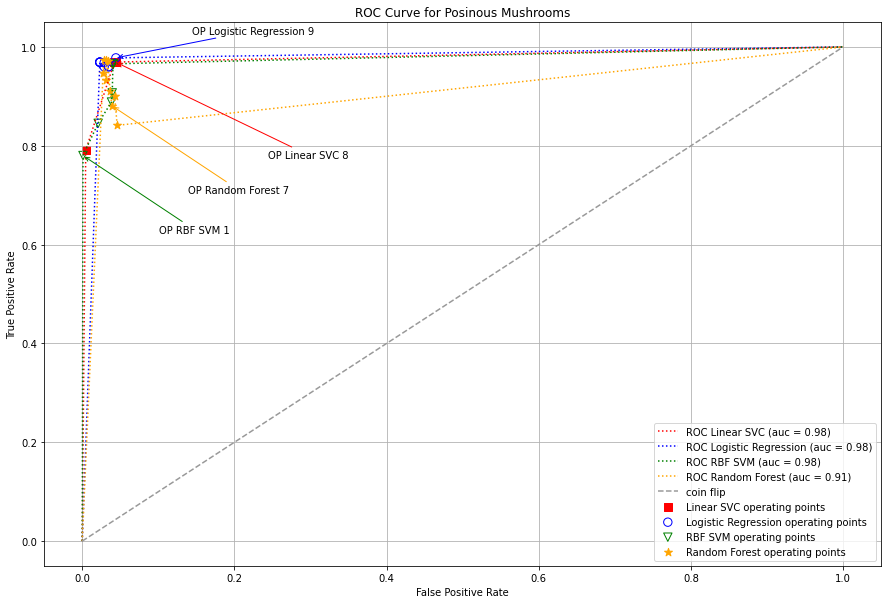

In [24]:
# Plot
plt.figure(figsize=(15,10))
plt.plot(fpr_svc, tpr_svc, ':', color='red', label='ROC Linear SVC (auc = %0.2f)'% roc_auc_svc)
plt.plot(fpr_lr, tpr_lr, ':',  color='blue',label='ROC Logistic Regression (auc = %0.2f)'% roc_auc_lr)
plt.plot(fpr_rbf, tpr_rbf, ':',  color='green',label='ROC RBF SVM (auc = %0.2f)'% roc_auc_rbf)
plt.plot(fpr_rf, tpr_rf, ':',  color='orange',label='ROC Random Forest (auc = %0.2f)'% roc_auc_rf)
plt.scatter(FPR_svc, TPR_svc, 70, color='red', marker='s', label='Linear SVC operating points')
plt.scatter(FPR_lr, TPR_lr, 70,  color='blue', marker='o',label='Logistic Regression operating points',facecolors='none')
plt.scatter(FPR_rbf, TPR_rbf, 70,  color='green', marker='v',label='RBF SVM operating points',facecolors='none')
plt.scatter(FPR_rf, TPR_rf, 70,  color='orange', marker='*',label='Random Forest operating points')
plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

# Annotate certain operating points
plt.annotate('OP Linear SVC 8', xy=(fpr_svc[8], tpr_svc[8]), xytext=(fpr_svc[8]+.2, tpr_svc[8]*0.8), arrowprops=dict(arrowstyle="->",color='red'))
plt.annotate('OP Logistic Regression 9', xy=(fpr_lr[9], tpr_lr[9]), xytext=(fpr_lr[9]+0.1, tpr_lr[9]*1.05), arrowprops=dict(arrowstyle="->",color='blue'))
plt.annotate('OP RBF SVM 1', xy=(fpr_rbf[1], tpr_rbf[1]), xytext=(fpr_rbf[1]+0.1, tpr_rbf[1]*0.8), arrowprops=dict(arrowstyle="->",color='green'))
plt.annotate('OP Random Forest 7', xy=(fpr_rf[7], tpr_rf[7]), xytext=(fpr_rf[7]+0.1,tpr_rf[7]*0.8), arrowprops=dict(arrowstyle="->",color='orange'))

# Labels
plt.title('ROC Curve for Posinous Mushrooms')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# 2. [10 pts] What kind of behavior would you expect to see in Pd – Pf interaction of an ROC plot? Do you see it in yours?

## Answer
There are 3 situations for the ROC:
1. The ROC curves up towards the top left corner (0,1). The best classifier would have an AUC of 1.
2. The ROC has a slope of 1, which is the grey line that cuts across the middle from (0,0) to (1,1), which is no better than a coin flip. This gives an AUC of 0.5.
3. The ROC curves down towards the bottom right corner (1,0). This means that there is something wrong with our code since there would be an AUC of less than 0.5 and this is worse than a coin flip.

I would expect that the ROC plot must curve towards to the top left corner (0,1) since that would create an Area Under the Curve of larger than 0.5, which is the middle grey line (of slope 1) which is no better than a coin flip. **All of the models in this example have that shape of suituation 1**, which is expected!

# 3. [20 pts] From the ROC plot that you created make a selection of the classifier and hyperparameter setting for this problem. 

Note that we are classifying mushrooms so your
conclusion might be subjective but has to be supported by your findings

## Answer

I choose `Logistic Regression` with `C = 1e3` as it has the highest `True Positive Rate` of `0.97`. As we can see, it is the blue points and has one of the **highest Area Under the Curve** at `0.98`. The whole graph is also closest to the top left corner versus all other models. Although this also has the highest `False Positive Rate` of `0.04`, I believe it is justified since I'd rather be overly cautious and assume that a mushroom is `poisonious` and not eat it when it may actually be `edible`. This is acceptable and similar to the Breast Cancer Dataset where one would accept false positives over false negatives.